## Observations and Insights 

In [298]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
mouse_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_results.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [299]:
# Checking the number of mice.
mouse_count = mouse_results["Mouse ID"].nunique()
mouse_count

249

In [300]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# clean_mouse_results=mouse_results.sort_values("Timepoint").drop_duplicates(["Mouse ID"], keep="last")
clean_mouse_results["Mouse ID"].value_counts()

j913    10
x402    10
k403    10
l509    10
o287    10
        ..
n482     1
u153     1
o848     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [301]:
# Optional: Get all the data for the duplicate mouse ID. 


In [302]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 

clean_mouse_results = mouse_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [303]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_results["Mouse ID"].nunique()
clean_mouse_count 

249

## Summary Statistics

In [304]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_mean = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
data_median = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
data_variance = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
data_standard_deviation = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
data_sem = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
data = {
    "Mean": data_mean, 
    "Median": data_median, 
    "Variance": data_variance, 
    "Standard Deviation": data_standard_deviation,
    "SEM": data_sem
}


summary_statistics = pd.DataFrame(data, columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"])
summary_statistics
# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

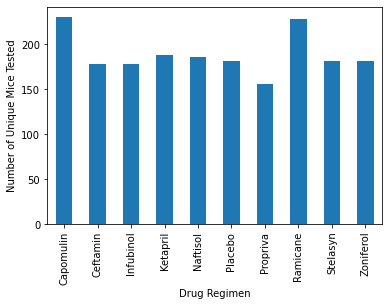

In [305]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
y_value = clean_mouse_results.groupby(["Drug Regimen"]).count()["Mouse ID"]

#show bar graph
y_value.plot(kind='bar')
plt.ylabel("Number of Unique Mice Tested")
plt.show()

#bar_graph_df = clean_mouse_data_df[["Drug Regimen", "Mouse ID"]]
#bar_graph_df = bar_graph_df.set_index("Drug Regimen")

#show bar graph


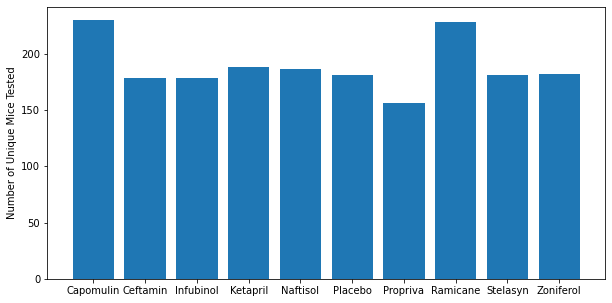

In [319]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#get drug names 
drug_names = summary_statistics.index.tolist()
drug_names
#get test_subject_count
test_subject_count = clean_mouse_results.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
test_subject_count

#set x-axis = drug names 
xaxis = np.arange(len(test_subject_count))
xaxis = drug_names

xaxis

#create the graph 
plt.figure(figsize=(len(xaxis), 5))
plt.bar(xaxis, test_subject_count)

plt.ylabel("Number of Unique Mice Tested")
plt.show()


In [307]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [308]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [309]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [310]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [311]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [312]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [313]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [314]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
